# Analysis of Non-Resident Tourist Travel Patterns in Argentina

## 1. Introduction
Tourism is an essential sector in Argentina, contributing significantly to the national economy. Understanding how non-resident tourist patterns vary by country of origin and mode of transport over time can reveal critical trends to inform policy and business decisions. This report examines historical travel data from non-resident tourists to Argentina, with an emphasis on trends, seasonal behaviors, and variations in transport modes.




## 2. Used Data

Data Source and Pipeline
The dataset was obtained from the [Yvera platform](https://datos.yvera.gob.ar) (official open-data portal for Argentina).
It records monthly arrivals of non-resident tourists to Argentina, categorized by:
**Country of Origin**: Origin of tourists.
**Mode of Transport**: Air, Road, or Other.
**Date**: Monthly data from 2015 to 2023.
**Tourist Count**: Number of tourists.

### Data Cleaning and Transformation
The data pipeline, implemented in Python, included:
1. **Downloading Data**: Fetching CSV data programmatically.
2. **Cleaning**: Standardizing column names, handling missing values, and ensuring numeric consistency.
3. **Transformation**: Aggregating and enriching data for deeper analysis.
4. **Storage**: Saving processed data in an SQLite database for efficient querying.

### Data License
The data complies with the open-data license of the Yvera platform, with proper attribution given.


## 3. Analysis
Code and Visualizations: We’ll query the database and analyze the trends using Python libraries like pandas, matplotlib, and seaborn.

3.1 Top Tourist Origins

In [10]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load data from SQLite database
conn = sqlite3.connect("../data/tourism_data.db")
query = "SELECT pais_origen, SUM(viajes_de_turistas_no_residentes) as total_tourists FROM tourism_data GROUP BY pais_origen ORDER BY total_tourists DESC LIMIT 5;"
top_countries = pd.read_sql_query(query, conn)

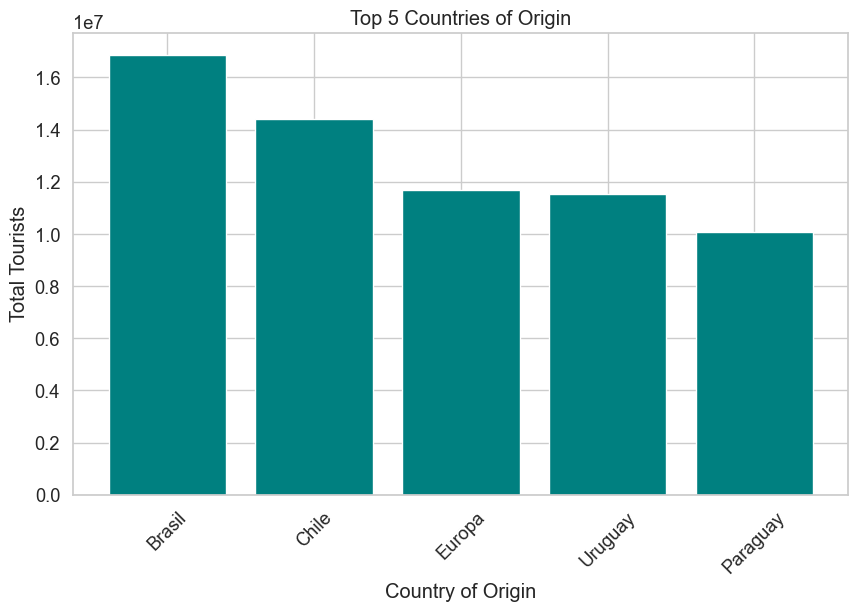

In [19]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_countries['pais_origen'], top_countries['total_tourists'], color='teal')
plt.title("Top 5 Countries of Origin")
plt.ylabel("Total Tourists")
plt.xlabel("Country of Origin")
plt.xticks(rotation=45)
plt.show()

## 3.2 Mode of Transport

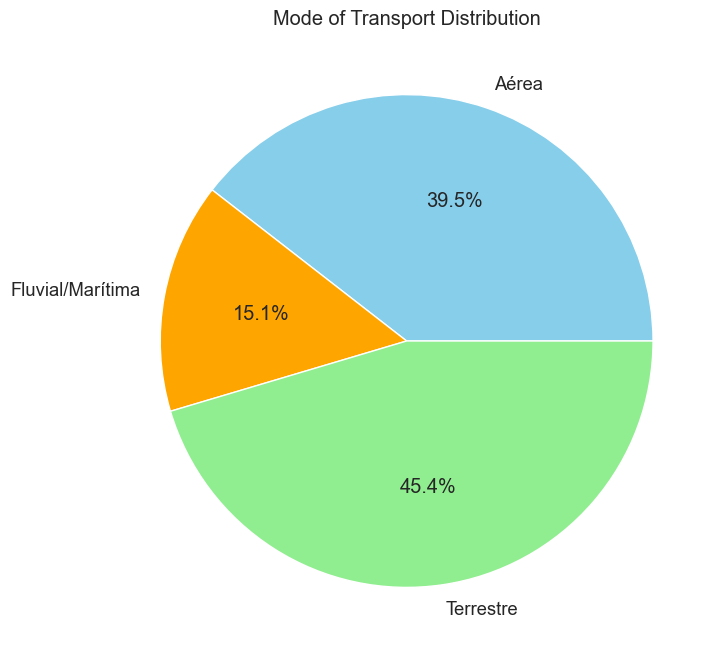

In [28]:
# Distribution of transport modes
query = "SELECT medio_de_transporte, SUM(viajes_de_turistas_no_residentes) as total_tourists FROM tourism_data GROUP BY medio_de_transporte;"
transport_modes = pd.read_sql_query(query, conn)

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(transport_modes['total_tourists'], labels=transport_modes['medio_de_transporte'], autopct='%1.1f%%', colors=["skyblue", "orange", "lightgreen"])
plt.title("Mode of Transport Distribution")
plt.show()


## 3.3 Seasonal Trends

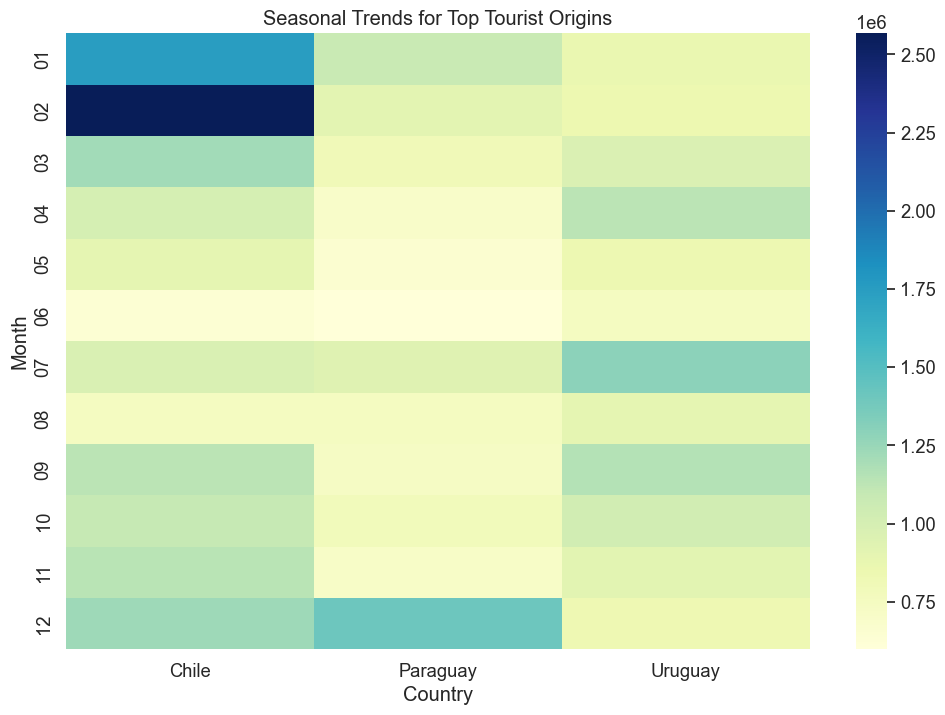

In [35]:
# Heatmap for seasonal trends (top countries only)
query = """
SELECT pais_origen, strftime('%m', indice_tiempo) as month, SUM(viajes_de_turistas_no_residentes) as total_tourists 
FROM tourism_data 
WHERE pais_origen IN ('Brazil', 'Chile', 'USA', 'Uruguay', 'Paraguay') 
GROUP BY pais_origen, month;
"""
seasonal_data = pd.read_sql_query(query, conn)

# Pivot for heatmap
seasonal_pivot = seasonal_data.pivot(index='month', columns='pais_origen', values='total_tourists')

# Heatmap ( Correlation analysis)
plt.figure(figsize=(12, 8))
sns.heatmap(seasonal_pivot, cmap="YlGnBu", annot=False, fmt=".0f")
plt.title("Seasonal Trends for Top Tourist Origins")
plt.xlabel("Country")
plt.ylabel("Month")
plt.show()


## 3.4 Yearly Trends

<Figure size 1200x600 with 0 Axes>

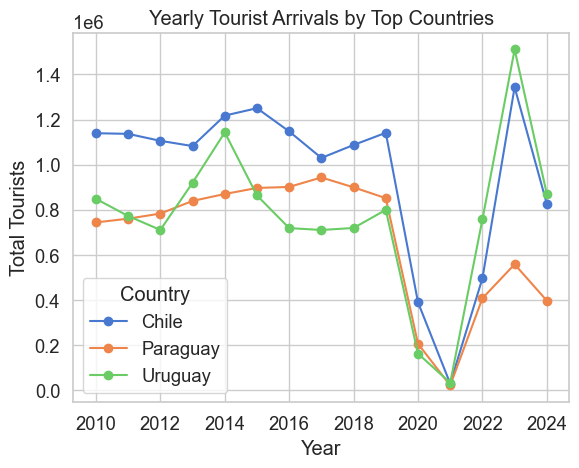

In [38]:
# Yearly trends for top countries
query = """
SELECT pais_origen, strftime('%Y', indice_tiempo) as year, SUM(viajes_de_turistas_no_residentes) as total_tourists 
FROM tourism_data 
WHERE pais_origen IN ('Brazil', 'Chile', 'USA', 'Uruguay', 'Paraguay') 
GROUP BY pais_origen, year;
"""
yearly_data = pd.read_sql_query(query, conn)

# Line plot for yearly trends
yearly_pivot = yearly_data.pivot(index='year', columns='pais_origen', values='total_tourists')

plt.figure(figsize=(12, 6))
yearly_pivot.plot(marker='o')
plt.title("Yearly Tourist Arrivals by Top Countries")
plt.ylabel("Total Tourists")
plt.xlabel("Year")
plt.legend(title="Country")
plt.show()


## 4. Conclusions

1. **Top Countries of Origin**: Brazil and Chile dominate tourist arrivals, followed by the USA, Uruguay, and Paraguay.
2. **Modes of Transport**: Air travel is the most common mode of transport, particularly for tourists from distant countries.
3. **Seasonal Trends**: Tourist arrivals peak during the summer (December-March) and winter (July) vacation periods.
4. **Yearly Trends**: While overall arrivals have grown for most countries, external factors like economic conditions and travel policies may influence fluctuations.


